<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

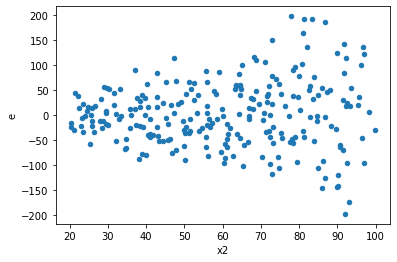

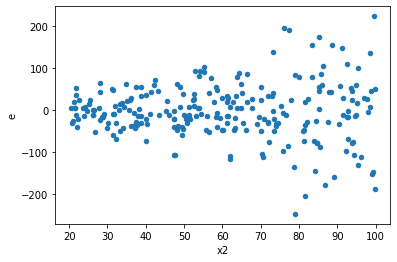

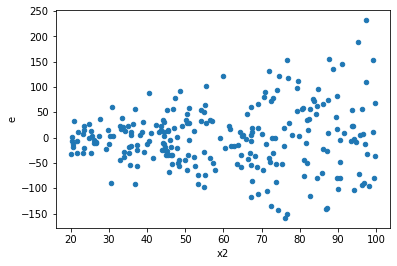

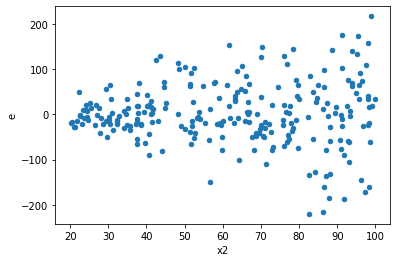

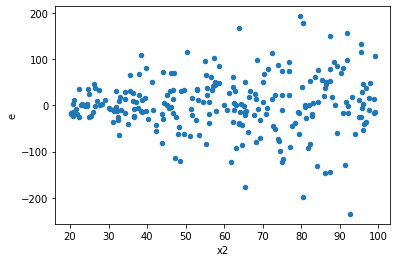

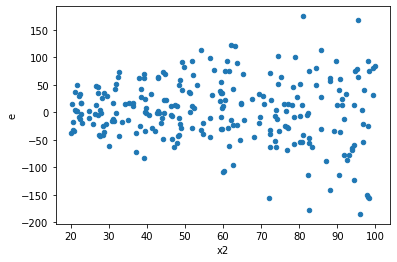

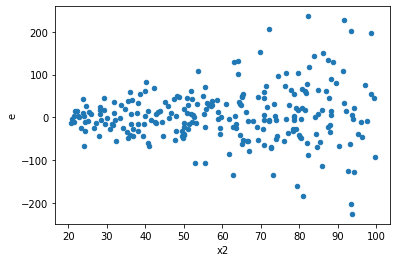

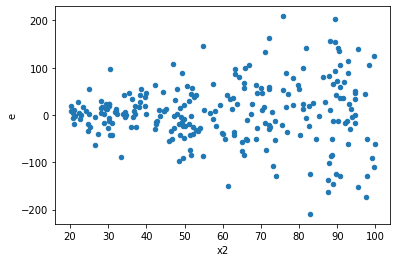

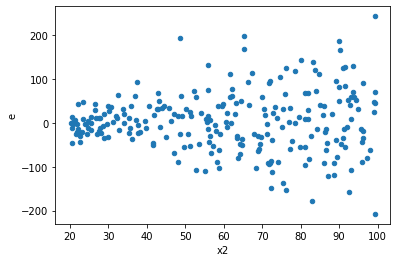

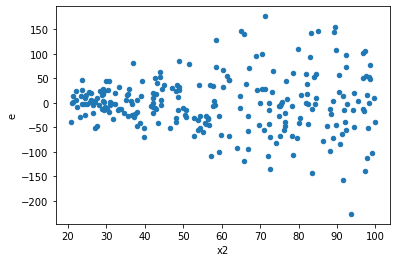

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,124.0,120.0,465802.5674777165,579592.4017454024,3756.4723183686815,4829.936681211687,1.285763948690344,0.1671663947416322,0.9164168026291839,0.0835831973708161,Reject001=1 : Homoscedasticity
2.0,117.0,127.0,407688.6076779711,507806.14094534854,3484.5180143416333,3998.4735507507758,1.1474968802841015,0.44694058236114476,0.7765297088194276,0.22347029118057238,Reject001=1 : Homoscedasticity
3.0,111.0,133.0,225278.94079534835,913758.5134455155,2029.5400071653005,6870.364762748237,3.3851832131874127,3.576672291671912e-11,0.9999999999821166,1.788336145835956e-11,Reject001=0 : Heteroscedasticity
7.0,118.0,126.0,189512.6967481278,855738.7205701,1606.0398029502358,6791.577147381746,4.228772621267462,1.4654943925052066e-14,0.9999999999999927,7.327471962526033e-15,Reject001=0 : Heteroscedasticity
9.0,129.0,115.0,313251.31331568846,462267.41537486087,2428.3047543851817,4019.7166554335727,1.6553592164140525,0.006100167463286121,0.9969499162683569,0.0030500837316430607,Reject001=0 : Heteroscedasticity
11.0,123.0,121.0,442681.22672387364,467248.4472983173,3599.0343636087287,3861.5574156885723,1.072942635595347,0.6984284788571669,0.6507857605714166,0.34921423942858343,Reject001=1 : Homoscedasticity
19.0,121.0,123.0,365957.6997762624,613599.9943959602,3024.4437998038215,4988.617840617563,1.6494331423652662,0.006029770706225124,0.9969851146468874,0.003014885353112562,Reject001=0 : Heteroscedasticity
23.0,130.0,114.0,505904.16109384166,535023.4567348494,3891.570469952628,4693.188216972363,1.2059882387352716,0.30619591987585126,0.8469020400620744,0.15309795993792563,Reject001=1 : Homoscedasticity
27.0,120.0,124.0,440706.1146905177,595550.1797328377,3672.550955754314,4802.82403010353,1.307762394032479,0.13928344835484285,0.9303582758225786,0.06964172417742143,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,102.0,142.0,538757.2727714474,501246.75491284474,5281.934046778896,3529.906724738343,0.6682981448605935,0.03152664627466366,Reject001=1 : Homoscedasticity
1.0,124.0,120.0,465802.5674777165,579592.4017454024,3756.4723183686815,4829.936681211687,1.285763948690344,0.1671663947416322,Reject001=1 : Homoscedasticity
2.0,117.0,127.0,407688.6076779711,507806.14094534854,3484.5180143416333,3998.4735507507758,1.1474968802841015,0.44694058236114476,Reject001=1 : Homoscedasticity
3.0,111.0,133.0,225278.94079534835,913758.5134455155,2029.5400071653005,6870.364762748237,3.3851832131874127,3.576672291671912e-11,Reject001=0 : Heteroscedasticity
4.0,122.0,122.0,609150.772344047,269395.63423454826,4993.039117574155,2208.160936348756,0.4422478743610526,9.13726042396465e-06,Reject001=0 : Heteroscedasticity
5.0,116.0,128.0,607731.2678494597,193281.7759608216,5239.062653874652,1510.0138746939188,0.28822214477186264,4.682374457129218e-11,Reject001=0 : Heteroscedasticity
6.0,116.0,128.0,501527.9810056501,494538.40029789467,4323.517077634914,3863.581252327302,0.8936199818229446,0.5382698131192294,Reject001=1 : Homoscedasticity
7.0,118.0,126.0,189512.6967481278,855738.7205701,1606.0398029502358,6791.577147381746,4.228772621267462,1.4654943925052066e-14,Reject001=0 : Heteroscedasticity
8.0,122.0,122.0,582470.583964915,535111.4628222917,4774.349048892746,4386.15953133026,0.9186926817484125,0.6402747368371391,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      585
Reject001=0 : Heteroscedasticity    415
Name: Result_test, dtype: int64